In [26]:
# Originally was working in TensorFlow
# this is me converting the work that was done in TensorFlow
# to Pytorch (our team has decided to switch to Pytorch)
# used https://www.youtube.com/watch?v=9OHlgDjaE2I to assist

# first we import the necessary libraries
import os
import numpy as np
import torch
import glob
import torch.nn as nn
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from torch.optim import Adam
from torch.autograd import Variable
import torchvision
import pathlib
import PIL
from PIL import Image

import matplotlib.pyplot as plt

In [2]:
# it took quite a lot of time to figure out what it meant to have 
# CUDA capable processor, after a lot of research on the PyTorch
# documentation I realized that mac isn't supported, not even the M1
# GPU, in addition the graphics card that I have on my desktop
# is not compatible either as it is a Radeon RX 5700 XT
# information about CUDA capabilities is here: 
# https://developer.nvidia.com/cuda-gpus# 
# spent quite a lot of time trying to figure this out
# to figure out what to install (also I had just switched
# to the mac interface from a long time windows user)
# the other way to check that I found out later
# is as so:

# this checks for the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [3]:
# knowing this ^ would have saved me a lot of time
# but now I know if I were to continue using PyTorch
# I would get a device that is CUDA capable for better processing
# or I would utilize TensorFlow (although I think TensorFlow has
# a more complex learning curve)

# moving on I set up the Transformations that I want to use for the 
# images
height = 180
width = 180

# this is to transform to Grayscale
# https://discuss.pytorch.org/t/convert-rgb-to-gray/49024/3
transform_image_setup=transforms.Compose([
    #transforms.Grayscale(num_output_channels=1),
    transforms.Resize((height, width)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.5,0.5,0.5],
                         [0.5,0.5,0.5])
])

In [4]:
# Load the data that we're using to train the model
# data was downloaded from:
# https://www.kaggle.com/jutrera/stanford-car-dataset-by-classes-folder

# number of images in the training folder
data_dir = pathlib.Path("carDataset/train")
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

8144


In [5]:
# number of images in the test folder
data_dir2 = pathlib.Path("carDataset/test")
image_count2 = len(list(data_dir2.glob('*/*.jpg')))
print(image_count2)

8041


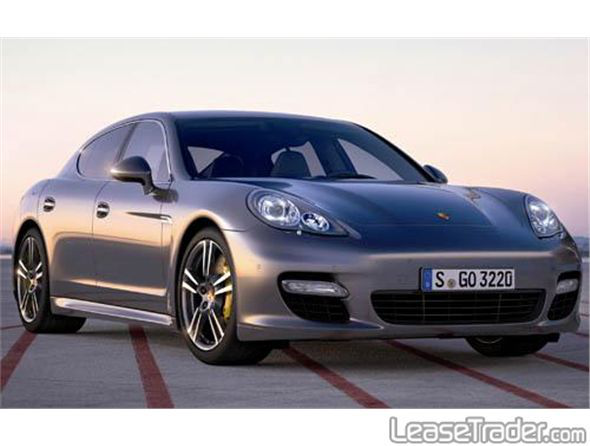

In [6]:
PorschePanamera = list(data_dir.glob('Porsche Panamera Sedan 2012/*'))
PIL.Image.open(str(PorschePanamera[2]))

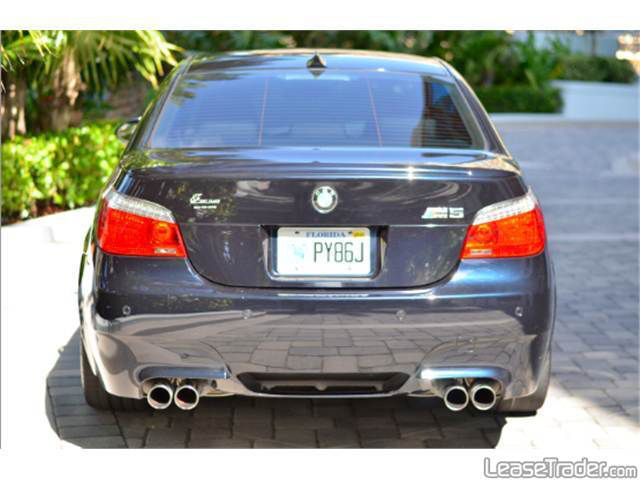

In [7]:
BMWM5 = list(data_dir.glob('BMW M5 Sedan 2010/*'))
PIL.Image.open(str(BMWM5[2]))

In [8]:
# load the data and transform
train_path = 'carDataset/train'
test_path = 'carDataset/test'

# batch_size is how big the image selection is
# shuffle is to randomize the images
train_loader=DataLoader(
    torchvision.datasets.ImageFolder(train_path,transform=transform_image_setup),
    batch_size=64, shuffle=True
)

# batch_size is how big the image selection is
# shuffle is to randomize the images
test_loader=DataLoader(
    torchvision.datasets.ImageFolder(test_path,transform=transform_image_setup),
    batch_size=32, shuffle=True
)

In [9]:
# see the categories
root=pathlib.Path(train_path)
classes=sorted([j.name.split('/')[-1] for j in root.iterdir()])

In [10]:
print(classes)

['.DS_Store', 'AM General Hummer SUV 2000', 'Acura Integra Type R 2001', 'Acura RL Sedan 2012', 'Acura TL Sedan 2012', 'Acura TL Type-S 2008', 'Acura TSX Sedan 2012', 'Acura ZDX Hatchback 2012', 'Aston Martin V8 Vantage Convertible 2012', 'Aston Martin V8 Vantage Coupe 2012', 'Aston Martin Virage Convertible 2012', 'Aston Martin Virage Coupe 2012', 'Audi 100 Sedan 1994', 'Audi 100 Wagon 1994', 'Audi A5 Coupe 2012', 'Audi R8 Coupe 2012', 'Audi RS 4 Convertible 2008', 'Audi S4 Sedan 2007', 'Audi S4 Sedan 2012', 'Audi S5 Convertible 2012', 'Audi S5 Coupe 2012', 'Audi S6 Sedan 2011', 'Audi TT Hatchback 2011', 'Audi TT RS Coupe 2012', 'Audi TTS Coupe 2012', 'Audi V8 Sedan 1994', 'BMW 1 Series Convertible 2012', 'BMW 1 Series Coupe 2012', 'BMW 3 Series Sedan 2012', 'BMW 3 Series Wagon 2012', 'BMW 6 Series Convertible 2007', 'BMW ActiveHybrid 5 Sedan 2012', 'BMW M3 Coupe 2012', 'BMW M5 Sedan 2010', 'BMW M6 Convertible 2010', 'BMW X3 SUV 2012', 'BMW X5 SUV 2007', 'BMW X6 SUV 2012', 'BMW Z4 Con

In [11]:
# now we use the CNN Network

print(len(classes))

197


In [12]:
class ConvNet(nn.Module):
    def __init__(self,num_classes=197):
        super(ConvNet,self).__init__()
        
        #Output size after convolution filter
        #((w-f+2P)/s) +1
        
        #Input shape= (256,3,180,180)
        
        self.conv1=nn.Conv2d(in_channels=3,out_channels=12,kernel_size=3,stride=1,padding=1)
        #Shape= (256,12,180,180)
        self.bn1=nn.BatchNorm2d(num_features=12)
        #Shape= (256,12,180,180)
        self.relu1=nn.ReLU()
        #Shape= (256,12,180,180)
        
        self.pool=nn.MaxPool2d(kernel_size=2)
        #Reduce the image size be factor 2
        #Shape= (256,12,90,90)
        
        
        self.conv2=nn.Conv2d(in_channels=12,out_channels=20,kernel_size=3,stride=1,padding=1)
        #Shape= (256,20,90,90)
        self.relu2=nn.ReLU()
        #Shape= (256,20,90,90)
        
        
        
        self.conv3=nn.Conv2d(in_channels=20,out_channels=32,kernel_size=3,stride=1,padding=1)
        #Shape= (256,32,90,90)
        self.bn3=nn.BatchNorm2d(num_features=32)
        #Shape= (256,32,90,90)
        self.relu3=nn.ReLU()
        #Shape= (256,32,90,90)
        
        
        self.fc=nn.Linear(in_features=90 * 90 * 32,out_features=num_classes)
        
        
        
        #Feed forwad function
        
    def forward(self,input):
        output=self.conv1(input)
        output=self.bn1(output)
        output=self.relu1(output)
            
        output=self.pool(output)
            
        output=self.conv2(output)
        output=self.relu2(output)
            
        output=self.conv3(output)
        output=self.bn3(output)
        output=self.relu3(output)
            
            
            #Above output will be in matrix form, with shape (256,32,90,90)
            
        output=output.view(-1,32*90*90)
            
            
        output=self.fc(output)
            
        return output

In [13]:
model=ConvNet(num_classes=197).to(device)

In [14]:
#Optmizer and loss function
optimizer=Adam(model.parameters(),lr=0.001,weight_decay=0.0001)
loss_function=nn.CrossEntropyLoss()

In [15]:
num_epochs=10

In [16]:
#calculating the size of training and testing images
train_count=len(glob.glob(train_path+'/**/*.jpg'))
test_count=len(glob.glob(test_path+'/**/*.jpg'))

In [17]:
print(train_count,test_count)

8144 8041


In [18]:
#Model training and saving best model

best_accuracy=0.0

for epoch in range(num_epochs):
    
    #Evaluation and training on training dataset
    model.train()
    train_accuracy=0.0
    train_loss=0.0
    
    for i, (images,labels) in enumerate(train_loader):
        if torch.cuda.is_available():
            images=Variable(images.cuda())
            labels=Variable(labels.cuda())
            
        optimizer.zero_grad()
        
        outputs=model(images)
        loss=loss_function(outputs,labels)
        loss.backward()
        optimizer.step()
        
        
        train_loss+= loss.cpu().data*images.size(0)
        _,prediction=torch.max(outputs.data,1)
        
        train_accuracy+=int(torch.sum(prediction==labels.data))
        
    train_accuracy=train_accuracy/train_count
    train_loss=train_loss/train_count
    
    
    # Evaluation on testing dataset
    model.eval()
    
    test_accuracy=0.0
    for i, (images,labels) in enumerate(test_loader):
        if torch.cuda.is_available():
            images=Variable(images.cuda())
            labels=Variable(labels.cuda())
            
        outputs=model(images)
        _,prediction=torch.max(outputs.data,1)
        test_accuracy+=int(torch.sum(prediction==labels.data))
    
    test_accuracy=test_accuracy/test_count
    
    
    print('Epoch: '+str(epoch)+' Train Loss: '+str(train_loss)+' Train Accuracy: '+str(train_accuracy)+' Test Accuracy: '+str(test_accuracy))
    
    #Save the best model
    if test_accuracy>best_accuracy:
        torch.save(model.state_dict(),'best_checkpoint.model')
        best_accuracy=test_accuracy


Epoch: 0 Train Loss: tensor(54.3277) Train Accuracy: 0.005893909626719057 Test Accuracy: 0.0048501430170376815
Epoch: 1 Train Loss: tensor(5.2740) Train Accuracy: 0.01362966601178782 Test Accuracy: 0.005223230941425196
Epoch: 2 Train Loss: tensor(5.2463) Train Accuracy: 0.02013752455795678 Test Accuracy: 0.005223230941425196
Epoch: 3 Train Loss: tensor(5.1083) Train Accuracy: 0.05513261296660118 Test Accuracy: 0.005223230941425196
Epoch: 4 Train Loss: tensor(4.7083) Train Accuracy: 0.13506876227897838 Test Accuracy: 0.004974505658500186
Epoch: 5 Train Loss: tensor(3.9585) Train Accuracy: 0.27222495088408644 Test Accuracy: 0.005720681507275215
Epoch: 6 Train Loss: tensor(2.9838) Train Accuracy: 0.4654960707269155 Test Accuracy: 0.005098868299962691
Epoch: 7 Train Loss: tensor(2.0373) Train Accuracy: 0.6407170923379175 Test Accuracy: 0.005223230941425196
Epoch: 8 Train Loss: tensor(1.3036) Train Accuracy: 0.7765225933202358 Test Accuracy: 0.005098868299962691
Epoch: 9 Train Loss: tensor(

In [19]:
# so at this point we have a 'best_checkpoint.model' saved
# the Epoch took ~1 hr 21 mins to run using just the macbook cpu
# now we will predict some data

checkpoint=torch.load('best_checkpoint.model')
model=ConvNet(num_classes=197)
model.load_state_dict(checkpoint)
model.eval()

ConvNet(
  (conv1): Conv2d(3, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(12, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (conv3): Conv2d(20, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): ReLU()
  (fc): Linear(in_features=259200, out_features=197, bias=True)
)

In [36]:
# this is the prediction function
def prediction(img_path,transforming):
    
    image=Image.open(img_path)
    
    image_tensor=transforming(image).float()
    
    
    image_tensor=image_tensor.unsqueeze_(0)
    
    if torch.cuda.is_available():
        image_tensor.cuda()
        
    input=Variable(image_tensor)
    
    
    output=model(input)
    index=output.data.numpy().argmax()
    
    pred=classes[index]
    
    return pred

In [37]:
pred_path = 'carPredict'

images_path=glob.glob(pred_path+'/*.jpg')

In [38]:
pred_dict={} # stores the prediction results in a dictionary

#Transforms
transformer=transforms.Compose([
    transforms.Resize((180,180)),
    transforms.ToTensor(),  #0-255 to 0-1, numpy to tensors
    transforms.Normalize([0.5,0.5,0.5], # 0-1 to [-1,1] , formula (x-mean)/std
                        [0.5,0.5,0.5])
])

for i in images_path:
    pred_dict[i[i.rfind('/')+1:]]=prediction(i,transformer)

In [39]:
pred_dict # will need to see if there's a way to make the model more accurate

{'2012-bmw-z4-sdrive28i_100360746_h.jpg': 'Mitsubishi Lancer Sedan 2012',
 'acura_integra_typeR2001.jpg': 'Mitsubishi Lancer Sedan 2012',
 'vwgolfhatchback1991.jpg': 'Mitsubishi Lancer Sedan 2012',
 '2012_toyota_corolla_angularfront.jpg': 'Mitsubishi Lancer Sedan 2012',
 '2012-aston-martin-v8-vantage-s-drive-review-car-and-driver-photo-391307-s-original.jpg': 'Mitsubishi Lancer Sedan 2012',
 '2012_bmw_1-series_convertible_135i_fq_oem_1_500.jpg': 'Mitsubishi Lancer Sedan 2012'}